**Activity 1**

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout,Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D



In [2]:
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Activity 2 : Load data and preprocessing**

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


4


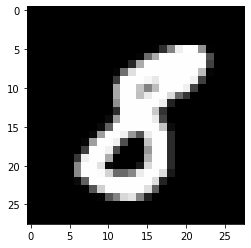

In [4]:
from matplotlib import pyplot as plt

i = np.random.randint(60000)
img = X_train[i]
plt.imshow(img, cmap="gray")
print(y_train[2])

In [5]:
#Input : 28x28x1 chiều, giá trị [0,1]
#Output là một vector 10 chiều , mỗi số biểu diễn khả năng ảnh là các số từ 0-9
X_train_scaled = np.array(X_train) / 255
X_test_scaled = np.array(X_test) / 255

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1, 1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()
print (y_train[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [7]:
inp = Input(shape = (28,28,1))
cnn = Conv2D(filters = 16, kernel_size= 5, activation = 'relu')(inp)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout (0.25) (pooling)

cnn = Conv2D(filters = 16, kernel_size=5, activation='relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout (0.25) (pooling)

f = Flatten() (drop)
fc1 = Dense (units = 32, activation = 'relu')(f)
fc2 = Dense (units = 32, activation = 'relu')(fc1)
out = Dense (units = 10, activation = 'softmax')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                         

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, batch_size=128, epochs = 50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
469/469 [==============================] - 14s 6ms/step - loss: 0.5112 - accuracy: 0.8341 - val_loss: 0.1171 - val_accuracy: 0.9655
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1511 - accuracy: 0.9540 - val_loss: 0.0685 - val_accuracy: 0.9778
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1139 - accuracy: 0.9644 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0920 - accuracy: 0.9715 - val_loss: 0.0477 - val_accuracy: 0.9842
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0819 - accuracy: 0.9748 - val_loss: 0.0429 - val_accuracy: 0.9867
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0722 - accuracy: 0.9769 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch

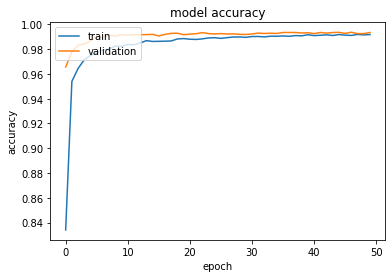

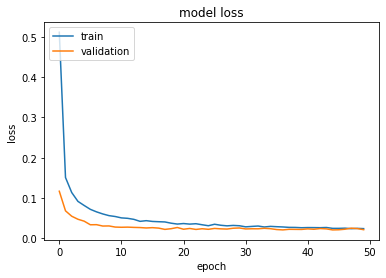

In [9]:
his = history
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 131ms/step
Giá trị dự đoán:  6


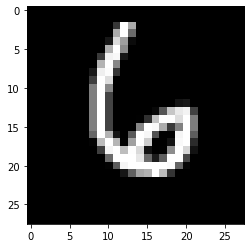

In [10]:
i = np.random.randint(10000)
plt.imshow(X_test_scaled[i], cmap='gray')

y_predict = model.predict(X_test[i].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

In [11]:
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print(score)

[0.02179005742073059, 0.993399977684021]


In [12]:
model.save('mnist.h5')